**GROUP HOMEWORK 01**
# IRIS CLASSIFICATION

## Learning Formula
\begin{equation*}
Cost = (\alpha^{(L)} - y)^{2}
\end{equation*}

\begin{equation*}
\alpha^{(L)} = \sigma \quad (w^{(L)} * \alpha^{(L-1)} + b^{(L)})
\end{equation*}

\begin{equation*}
\sigma = S(x) = \frac{1} {1+e^{-x}}
\end{equation*}

## Back-Propagation
\begin{equation*}
\bigtriangleup W_{h_{n}} = \eta * \delta_y * h_n \\
\bigtriangleup b_{y} = - \eta * \delta_y
\end{equation*}

\begin{equation*}
\bigtriangleup W_{h_{x}} = \eta * \delta_{h_{n}} * X_i \\
\bigtriangleup b_{h_{n}} = \eta * \delta_{h_{n}}
\end{equation*}

**For All weight and biases update**
\begin{equation*}
w_t = w + \bigtriangleup w \\
b_t = b + \bigtriangleup b
\end{equation*}

In [9]:
import matplotlib.pyplot as plt
import random as rnd
import math
import numpy as np
import time
import pandas as pd
import copy
from sklearn.preprocessing import normalize

In [10]:
start_time = time.time()
# parameter
learning_rate = 0.5
nb_iteration = 1000

# input, Hiddenlayer, Output
#                    I  H  Y
neuron_layer_list = [4, 9, 3]

nb_hidden_layer = len(neuron_layer_list) - 2

In [11]:
# creating random weight and bias
def initiaterandom():
    weight_matrix = []
    bias_matrix = []
    for i in range(len(neuron_layer_list) - 1):
        random_bias_list = [rnd.uniform(0,1) for j in range(neuron_layer_list[i+1])]
        bias_matrix.append(random_bias_list)
        # for each neuron in spesific hidden layer
        for j in range(neuron_layer_list[i+1]):
            random_weight_list = [rnd.uniform(0,1) for k in range(neuron_layer_list[i])]
            weight_matrix.append(random_weight_list)
    return weight_matrix, bias_matrix

def datasets():
    # read iris dataset csv using pandas
    data_matrix = pd.read_csv("Iris_Dataset.csv")
    # create output neuron
    data_matrix['o1'] = 0
    data_matrix['o2'] = 0
    data_matrix['o3'] = 0
    # set output value. iris-setosa[1,0,0], iris-versicolor[0,1,0], iris-virginica[0,0,1]
    data_matrix.loc[data_matrix['Output'] == 'Iris-setosa', 'o1'] = 1
    data_matrix.loc[data_matrix['Output'] == 'Iris-versicolor', 'o2'] = 1
    data_matrix.loc[data_matrix['Output'] == 'Iris-virginica', 'o3'] = 1
    # shuffle dataset
    data_matrix = data_matrix.sample(frac=1).reset_index(drop=True)
    # delete output column
    del data_matrix['Output']
    # convert dataframe to list
    data_list = data_matrix.values.tolist()
    # normalize
    data_list2 = np.array(data_list)
    data_list3 = normalize(data_list2[:,0:4]).tolist()
    data_list4 = data_list2[:,4:].tolist()
    data_list5 = []
    for i in range(len(data_list3)):
        data_list3[i].extend(data_list4[i])
        data_list5.append(data_list3[i])
    data_list6 = data_list5[0:120].copy()
    data_list7 = data_list5[120:].copy()
    return data_list6, data_list7

def sigmoid_calc(z):
    sigmoid = 1/(1+math.e**(-z))
    return sigmoid

def learningphase(dataset, w_matrix, b_matrix):
    h_value_list = []
    y_output_list = []
    # LEARNING PHASE
    # only 1 for this case
    for k in range(nb_hidden_layer):
        z_list = []
        h_list = []
        # for each of neuron is in the spesific hidden layer. k is refering n th to the layer. +1 because neuron layer list
        # from input amount --> hidden layer --> output
        for l in range(neuron_layer_list[k+1]):
            # for each number of input coming to each neuron in the hidden layer. 0 refers to the input, because how
            # many neuron input use is stored in first list of neuron layer list
            sigma_w_a = 0
            w = w_matrix[l]
            for m in range(neuron_layer_list[0]):
                sigma_w_a = sigma_w_a + (dataset[m] * w[m])
            b = b_matrix[k]
            z = sigma_w_a - b[l]
            z_list.append(z)

        # applying sigmoid function to z
        for l in range(len(z_list)):
            h = sigmoid_calc(z_list[l])
            h_list.append(h)
        h_value_list.append(h_list)

    # for the number of neuron output have
    for j in range(neuron_layer_list[-1]):
        # number of input coming from the latest hidden layer to output neuron
        # because list[-1] is output, the last hidden layer should be list[-2]
        z_output = 0
        for k in range(neuron_layer_list[-2]):
            w = w_matrix[neuron_layer_list[-2]+j]
            z_output = z_output + (h_value_list[-1][k]*w[k])
        b = b_matrix[-1]
        z_output = z_output - b[j]
        y_output = sigmoid_calc(z_output)
        y_output_list.append(y_output)

    return h_value_list, y_output_list

def reverselist(h_value_list, dataset, w_matrix):
    h_value_list_reversed = h_value_list[::-1]
    #h_value_list_reversed.append(dataset)
    w_matrix_reversed = w_matrix[::-1]
    return h_value_list_reversed, w_matrix_reversed

def backpropagation(h_value_list_reversed, y_output_list, dataset, w_matrix_reversed, b_matrix):
    # BACK PROPAGATION START FROM HERE
    delta_y_list = []
    delta_h_list = []
    triangle_w_list = []
    triangle_b_list = []
    sigma_deltay_times_w = []
    # for how many layer to do back propagation (neuron layer list minus input layer)
    for h in range(len(neuron_layer_list) - 1):
        last_layer_neuron = neuron_layer_list[-1 * (1 + h)]
        second_last_layer_neuron = neuron_layer_list[-1 * (2+h)]
        # if the layer is output
        if h == 0: 
            triangle_b_temp = []
            delta_y_times_w = []
            # for each neuron in output.
            for i in range(last_layer_neuron):
                # find delta y and triangle bias output
                delta_y = y_output_list[i] * (dataset[-3 + i]-y_output_list[i]) * (1-y_output_list[i])
                delta_y_list.append(delta_y)
                triangle_by = -1 * learning_rate * delta_y
                triangle_b_temp.append(triangle_by)
                triangle_whn_temp = []
                # for all neuron that is in second last layer
                for j in range(second_last_layer_neuron):
                    # find delta w
                    triangle_whn = learning_rate * delta_y * h_value_list_reversed[h][j]
                    triangle_whn_temp.append(triangle_whn)
                triangle_w_list.append(triangle_whn_temp)
            triangle_b_list.append(triangle_b_temp)
            triangle_w_list = triangle_w_list[::-1]

            #find value sigma delta_y * weight
            # for each neuron in hidden layer before output
            for i in range(second_last_layer_neuron):
                delta_temp = []
                #for each neuron in output
                for j in range(last_layer_neuron):
                    a = delta_y_list[-1 - j] * w_matrix_reversed[j][i]
                    delta_temp.append(a)
                delta_y_times_w.append(delta_temp)
            sigma_deltay_times_w.append(delta_y_times_w)

        else:
            triangle_b_temp = []
            delta_h_temp = []
            # number of neuron is in the target hidden layer
            for i in range(last_layer_neuron):
                # find delta h and triangle bias output
                delta_h = h_value_list_reversed[-1 * (h)][-1 * (i+1)] * (1-h_value_list_reversed[-1 * (h)][-1 * (i+1)])*sum(sigma_deltay_times_w[h-1][-1*(i+1)])
                delta_h_temp.append(delta_h)
                triangle_bh = -1 * learning_rate * delta_h
                triangle_b_temp.append(triangle_bh)
                triangle_whn_temp = []
                # for all neuron that is in second last layer
                for j in range(second_last_layer_neuron):
                    # find delta w
                    triangle_whn = learning_rate * delta_h * dataset[j]
                    triangle_whn_temp.append(triangle_whn)
                triangle_w_list.append(triangle_whn_temp)
            delta_h_temp = delta_h_temp[::-1]
            delta_h_list.append(delta_h_temp)
            triangle_b_temp = triangle_b_temp[::-1]
            triangle_b_list.append(triangle_b_temp)
    
    return delta_y_list, delta_h_list, triangle_w_list, triangle_b_list, sigma_deltay_times_w

def adjustweightandbias(w_matrix, b_matrix, triangle_w_list, triangle_b_list):
    # reverse back triangle lists first
    triangle_w_list_reversedback = triangle_w_list[::-1]
    triangle_b_list_reversedback = triangle_b_list[::-1]
    # for weight adjustment
    new_w_matrix = []
    for i in range(len(w_matrix)):
        w = (np.array(w_matrix[i]) + np.array(triangle_w_list_reversedback[i])).tolist()
        new_w_matrix.append(w)
    # for bias adjustment
    new_b_matrix = []
    for i in range(len(b_matrix)):
        b = (np.array(b_matrix[i]) + np.array(triangle_b_list_reversedback[i])).tolist()
        new_b_matrix.append(b)

    return new_w_matrix, new_b_matrix
    
def cost_calculation():
    ## THIS SHOULD BE THE MAIN formula
    w_matrix, b_matrix = initiaterandom()
    dataset, training_set = datasets()
    all_yj = []
    error_list = []
    #i = 0
    #while error >= 0.1:
    for i in range(nb_iteration):    
        y_output_rmse = []
        for j in range(len(dataset)):
            x = dataset[j]
            h_value_list, y_output_list = learningphase(x, w_matrix, b_matrix)
            h_value_list_reversed, w_matrix_reversed = reverselist(h_value_list, x, w_matrix)
            delta_y_list, delta_h_list, triangle_w_list, triangle_b_list, sigma_deltay_times_w =\
            backpropagation(h_value_list_reversed, y_output_list, x, w_matrix_reversed, b_matrix)
            w_matrix, b_matrix = adjustweightandbias(w_matrix, b_matrix, triangle_w_list, triangle_b_list)
            y_output_rmse.append(y_output_list)
        all_yj.append(y_output_rmse)
        # for each dataset
        errors = []
        for k in range(len(y_output_rmse)):
            x = dataset[k]
            # for each neuron output have
            for l in range(neuron_layer_list[-1]):
                error = ((y_output_rmse[k][l] - x[neuron_layer_list[0]+l])**2)
                errors.append(error)       
        errorss = math.sqrt(sum(errors) / (len(y_output_rmse)*neuron_layer_list[-1]))
        error_list.append(errorss)
        if (i+1) % 100 == 0:
            print('Iteration #%s. Error = %s' % (str(i+1), str(errorss)))
    return w_matrix, b_matrix, dataset, training_set, error_list
    
def recall(dataset, w_matrix, b_matrix):
    h_value_list = []
    y_output_list = []
    # LEARNING PHASE
    # only 1 for this case
    for k in range(nb_hidden_layer):
        z_list = []
        h_list = []
        # for each of neuron is in the spesific hidden layer. k is refering n th to the layer. +1 because neuron layer list
        # from input amount --> hidden layer --> output
        for l in range(neuron_layer_list[k+1]):
            # for each number of input coming to each neuron in the hidden layer. 0 refers to the input, because how
            # many neuron input use is stored in first list of neuron layer list
            sigma_w_a = 0
            w = w_matrix[l]
            for m in range(neuron_layer_list[0]):
                sigma_w_a = sigma_w_a + (dataset[m] * w[m])
            b = b_matrix[k]
            z = sigma_w_a - b[l]
            z_list.append(z)

        # applying sigmoid function to z
        for l in range(len(z_list)):
            h = sigmoid_calc(z_list[l])
            h_list.append(h)
        h_value_list.append(h_list)

    # for the number of neuron output have
    for j in range(neuron_layer_list[-1]):
        # number of input coming from the latest hidden layer to output neuron
        # because list[-1] is output, the last hidden layer should be list[-2]
        z_output = 0
        for k in range(neuron_layer_list[-2]):
            w = w_matrix[neuron_layer_list[-2]+j]
            z_output = z_output + (h_value_list[-1][k]*w[k])
        b = b_matrix[-1]
        z_output = z_output - b[j]
        y_output = sigmoid_calc(z_output)
        y_output_list.append(y_output)
    
    return y_output_list

In [23]:
a, b, c, d, e= cost_calculation()

Iteration #100. Error = 0.1888935565942776
Iteration #200. Error = 0.15956515224932902
Iteration #300. Error = 0.15136721664610397
Iteration #400. Error = 0.14776616821869368
Iteration #500. Error = 0.14578082389305277
Iteration #600. Error = 0.1439914022836703
Iteration #700. Error = 0.14227615482002587
Iteration #800. Error = 0.1406785528230673
Iteration #900. Error = 0.13922662169580038
Iteration #1000. Error = 0.1379206809404846


In [24]:
a

[[-2.2234852386566955,
  -1.4536941112166697,
  2.8240658519584927,
  3.7637781828568553],
 [14.114973798542012,
  14.138633443833047,
  -19.970238789857934,
  -23.94671411485086],
 [-7.15817868621622, -4.937004185084088, 8.48799620126012, 13.0123985507635],
 [2.490496044203958,
  4.18377320293492,
  -7.149461729234333,
  -3.0680985639808522],
 [2.672478344282864,
  2.7549498015565095,
  -4.385836369683323,
  -3.671185641220591],
 [-5.227163592405838,
  -3.0336635669894143,
  5.511655037505793,
  9.00532754466029],
 [0.73049457892609,
  2.9082685718112464,
  -3.985364419260196,
  -0.9492442465801115],
 [-2.528006356203929,
  -1.4855490965895088,
  2.6321989755748327,
  3.974306131777282],
 [-1.7927918921010677,
  -6.5274625277606715,
  11.506340562933735,
  6.099238037114031],
 [-1.468740260919155,
  2.700471079750252,
  -2.541209836704162,
  2.9050460680207064,
  1.773411772241189,
  -1.4786108330162113,
  1.5501177759946199,
  -0.8775719406961736,
  -7.1198228267467805],
 [-1.8271982

In [25]:
b

[[1.6837584526095415,
  0.4498596856506457,
  1.3096464155234333,
  0.45309461100270204,
  0.825204210785079,
  1.1930145825228409,
  0.5838823731777114,
  1.4171085577405178,
  0.39245555507713475],
 [1.5568040940416923, 7.200840928992317, 3.8470241151178395]]

In [16]:
e

[0.5048973136191437,
 0.47654950959455816,
 0.4712511443206446,
 0.4618469340153564,
 0.4453163121660445,
 0.42073462503409625,
 0.3939535461639793,
 0.37304782978829304,
 0.35966009585635733,
 0.3513269441136126,
 0.3457715396783159,
 0.3416957691486603,
 0.3384354757434504,
 0.33565273417112784,
 0.3331718019265581,
 0.33089901486652007,
 0.328783353641663,
 0.32679633683890785,
 0.3249213894916294,
 0.32314808082947977,
 0.32146897976829064,
 0.31987796306885924,
 0.31836933954770913,
 0.31693742846682565,
 0.3155763824592268,
 0.3142801336567042,
 0.3130423941834051,
 0.3118566736581683,
 0.3107162952239968,
 0.3096144028724058,
 0.3085439594047,
 0.3074977379659941,
 0.3064683116063756,
 0.3054480452129476,
 0.30442909269770657,
 0.30340339993512777,
 0.3023627114232643,
 0.30129857723844655,
 0.3002023579333597,
 0.29906522936377156,
 0.2978781963981157,
 0.29663213175496106,
 0.29531786048849157,
 0.2939263089757176,
 0.29244872852223375,
 0.29087698907391013,
 0.289203921021527

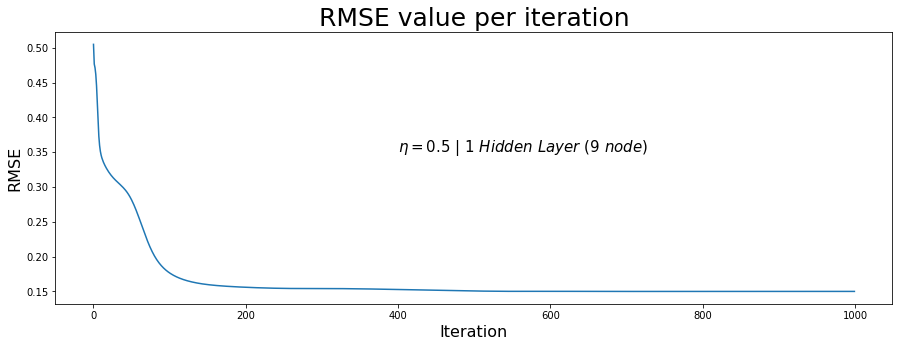

In [14]:
plt.figure(figsize=(15,5))
plt.title('RMSE value per iteration', size = 25)
plt.xlabel('Iteration', size = 16)
plt.ylabel('RMSE', size = 16)
plt.text(400, .35, r'$\eta=%s \ | \ 1 \ Hidden \ Layer \ (%s \ node)$' %(learning_rate, neuron_layer_list[1]), size = 15) 
plt.plot(e)

In [6]:
print("Running time: %s seconds " % (time.time() - start_time))

Running time: 21.629574298858643 seconds 


In [18]:
expected_output_list = []
for i in range(len(d)):
    d2 = d[i]
    d3 = d2[4:]
    expected_output_list.append(d3)

In [19]:
test_output = []
for i in range(len(d)):
    test = recall(d[i], a, b)
    for j in range(len(test)):
        if test[j] >= 0.5:
            test[j] = 1
        else:
            test[j] = 0
    test_output.append(test)

In [20]:
list_true = []
for i in range(len(d)):
    a = test_output[i] == expected_output_list[i]
    list_true.append(a)

In [21]:
#30 test training from the dataset
sum(list_true)

29

True

## need to upgrade bunch of loop to allow automated calculation of any number of nodes and hidden layer
### initiate random upgrade (can use dataset parameter), using 2(i) + 1 number of nodes (i) is number of input.

In [5]:
# read iris dataset csv using pandas
data_matrix = pd.read_csv("Iris_Dataset.csv")
# create output neuron
data_matrix['o1'] = 0
data_matrix['o2'] = 0
data_matrix['o3'] = 0
# set output value. iris-setosa[1,0,0], iris-versicolor[0,1,0], iris-virginica[0,0,1]
data_matrix.loc[data_matrix['Output'] == 'Iris-setosa', 'o1'] = 1
data_matrix.loc[data_matrix['Output'] == 'Iris-versicolor', 'o2'] = 1
data_matrix.loc[data_matrix['Output'] == 'Iris-virginica', 'o3'] = 1
# shuffle dataset
data_matrix = data_matrix.sample(frac=1).reset_index(drop=True)
# delete output column
del data_matrix['Output']
# convert dataframe to list
data_list = data_matrix.values.tolist()
# normalize
data_list2 = np.array(data_list)
data_list3 = normalize(data_list2[:,0:4]).tolist()
data_list4 = data_list2[:,4:].tolist()
data_list5 = []
for i in range(len(data_list3)):
    data_list3[i].extend(data_list4[i])
    data_list5.append(data_list3[i])
data_list6 = data_list5[0:120].copy()
data_list7 = data_list5[120:].copy()

In [6]:
data_matrix

,A,B,C,D,o1,o2,o3
0,7.6,3.0,6.6,2.1,0,0,1
1,5.1,3.7,1.5,0.4,1,0,0
2,7.7,2.6,6.9,2.3,0,0,1
3,5.7,3.8,1.7,0.3,1,0,0
4,5.8,2.7,5.1,1.9,0,0,1
5,6.1,2.8,4.0,1.3,0,1,0
6,5.2,4.1,1.5,0.1,1,0,0
7,6.6,3.0,4.4,1.4,0,1,0
8,5.7,3.0,4.2,1.2,0,1,0
9,5.5,2.4,3.7,1.0,0,1,0
